# Visualizations with Python (part 2)

## Contents:
1. Import libraries and data.
2. Creation of visualizations
   - Bar chart
   - Line chart
   - Scatterplot     

### 1. Import libraries and data.

In [27]:
# Import libraries, the last three for data visualizations
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [28]:
# define path
path = r'C:\Users\Administrator\Documents\data analytics\Instacart Basket Analysis\02 Data\Prepared data'

In [29]:
# import ords_prods_custs. I call it opc to have a short name.
opc = pd.read_pickle(os.path.join(path, 'ords_prods_custs.pkl'))

In [30]:
# Check if imported
opc.head(2)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,validation,product_id,add_to_cart_order,reordered,...,avg_price,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,NaN,prior,196.0,1.0,0.0,...,5.9,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,prior,14084.0,2.0,0.0,...,5.9,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South


In [31]:
opc.shape

(32641268, 32)

In [32]:
# Check what values to expect.
opc['loyalty_flag'].unique()

array(['Low spender', nan], dtype=object)

### 2. Creation of visualizations (bar chart, line chart, scatterplot)

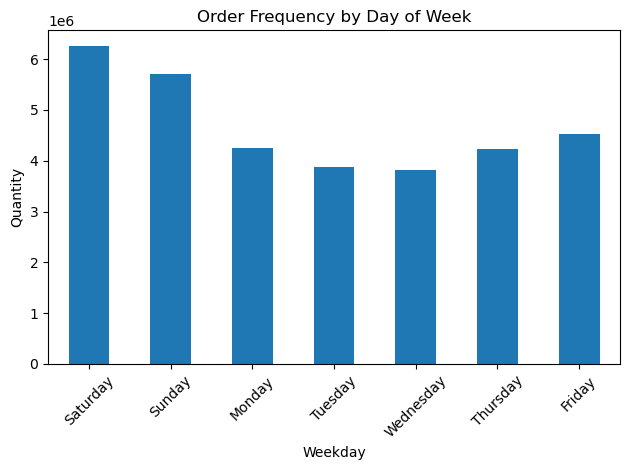

In [33]:
# Create a bar chart (on the frequency, which is why value counts is used). I created all charts for exercise 2 in the separate file 4.9 READING Intro to Data Vis. No need to repeat them here to keep it as clean as possible.
# Map weekday numbers to names
weekday_names = {
    0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday',
    4: 'Wednesday', 5: 'Thursday', 6: 'Friday'
}

# Count and sort by weekday number
counts = opc['orders_day_of_week'].value_counts().sort_index()

# Replace index numbers with names
counts.index = counts.index.map(weekday_names)

# Plot
counts.plot.bar()
plt.xlabel('Weekday')
plt.ylabel('Quantity')
plt.title('Order Frequency by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


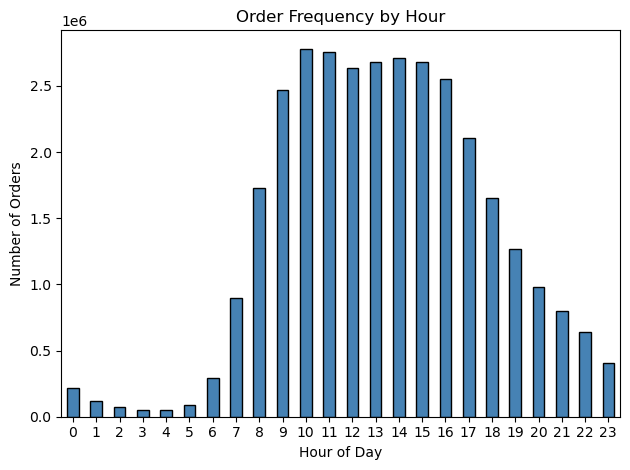

In [34]:
# (3) Create a histogram with sort index (on the frequency, which is why value counts is used)
opc['order_hour_of_day'].value_counts().sort_index().plot(
    kind='bar',
    color='steelblue',
    edgecolor='black'
)

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Order Frequency by Hour')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
# The histogram shows the frequency of orders during different hours of the day, that is during what times the sales peaks occur. However, it does not tell me how many orders that are placed during these times which would be the most interesting data.

Text(0.5, 1.0, 'Order frequency per day distributed by hour')

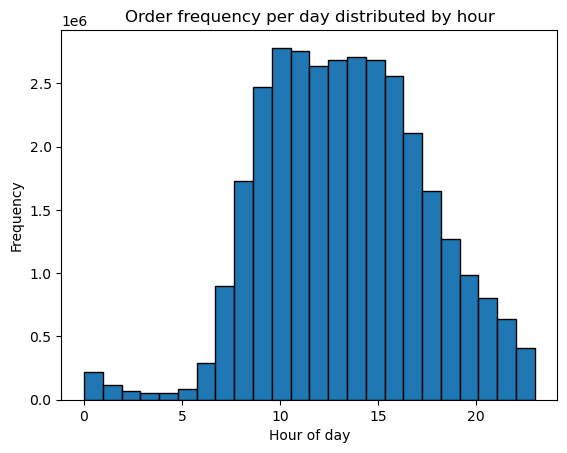

In [36]:
# Histogram with order of day values, showing how many orders are placed during different times.
opc['order_hour_of_day'].plot.hist(bins=24, edgecolor='black')

# Label the axes
plt.xlabel('Hour of day')
plt.ylabel('Frequency')

# Optional: add a title
plt.title('Order frequency per day distributed by hour')

In [37]:
# Histogram shows how many orders are placed on the y-axis. On the x-axis the hours of the day are visualized. The sales peak is in the morning at 7-8 am. 

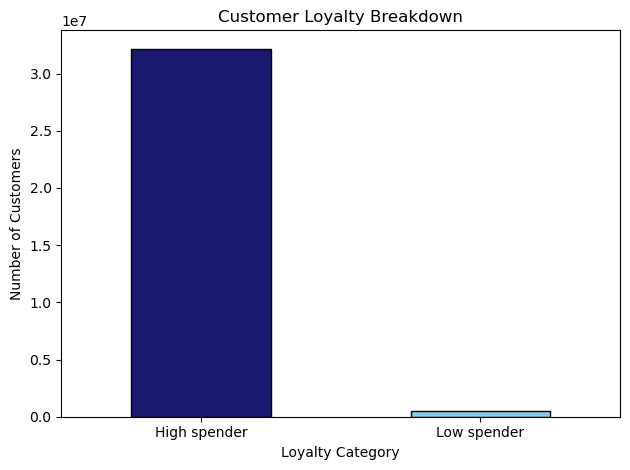

In [38]:
# Create a bar chart from the loyalty flag column
# Get value counts
counts = opc['spending_flag'].value_counts()

# Define custom colors (must match number of bars)
custom_colors = ['midnightblue', 'skyblue']  # Add more if more bars

# Plot with custom bar colors
counts.plot.bar(
    color=custom_colors,
    edgecolor='black'
)

plt.title('Customer Loyalty Breakdown')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [39]:
# This bar chart shows how many customers that are classified as "low spenders" in the loyalty flag column.

In [40]:
# Generation of random numbers, sample, to be included. The True and False depends on if the entry is 0,7 <= (smaller or equal to 0.7).
np.random.seed(4)
dev = np.random.rand(len(opc)) <= 0.7

In [41]:
dev

array([False,  True, False, ...,  True, False,  True])

In [42]:
# Store 70 % of opc in sample big (0,7)
big = opc[dev]

In [43]:
# Store 0 % of opc in sample small (0,3)
small = opc[~dev]

In [44]:
# Check rows in complete df opc
len(opc)

32641268

In [45]:
# Check if nr of rows correspond to the complete one, if I summarize the rows in the big and small df opc
len(big)+len(small)

32641268

In [46]:
# Create a new data frame with only the prices and order_hour_of_day to avoid performance issues
opc_2 = small[['order_hour_of_day','prices']]

([<matplotlib.axis.YTick at 0x2b09aea7440>,
 [Text(0, 0, '0'),
  Text(0, 2, '2'),
  Text(0, 4, '4'),
  Text(0, 6, '6'),
  Text(0, 8, '8'),
  Text(0, 10, '10'),
  Text(0, 12, '12'),
  Text(0, 14, '14')])

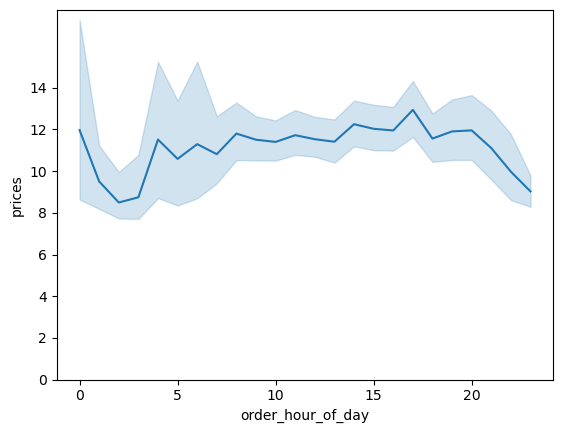

In [47]:
# Creation of line chart
line = sns.lineplot(data = opc_2, x = 'order_hour_of_day',y = 'prices')
plt.yticks(range(0, 15, 2))  # ticks from 0 to 15 in steps of 2

In [48]:
# There are differences in expenditure depending on the hour of the day. The peak in expenditure seems to be at 2 p.m. 

In [49]:
# Df for big sample
opc_1 = big[['order_hour_of_day','prices']]

([<matplotlib.axis.YTick at 0x2b09ad9c680>,
 [Text(0, 0, '0'),
  Text(0, 2, '2'),
  Text(0, 4, '4'),
  Text(0, 6, '6'),
  Text(0, 8, '8'),
  Text(0, 10, '10'),
  Text(0, 12, '12'),
  Text(0, 14, '14')])

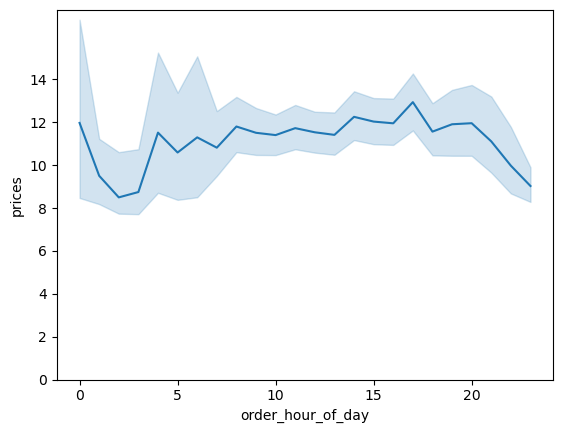

In [50]:
# Line chart for big sample. It looks the same as in the small sample, also the values. (???)
line = sns.lineplot(data = opc_2, x = 'order_hour_of_day',y = 'prices')
plt.yticks(range(0, 15, 2))  # ticks from 0 to 15 in steps of 2

In [27]:
# Create a new data frame with only the age and nr of dependants to avoid performance issues
opc_3 = opc[['age','n_dependants']]

(1.0, 4.0)

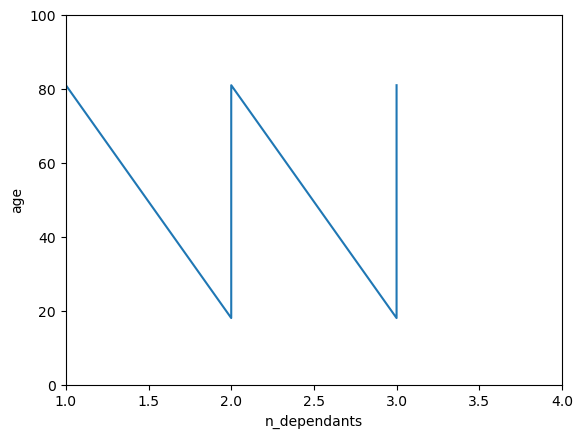

In [28]:
# Create the line chart

sns.lineplot(data=opc_3, x='n_dependants', y='age', estimator=None)
plt.ylim(0, 100)  # Set the y-axis to go from 0 to 100
plt.xlim(1, 4)


(0.0, 800000.0)

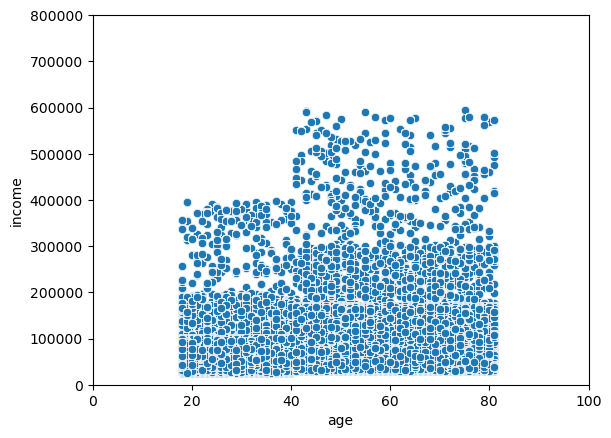

In [29]:
# Create a scatterplot. Use it do identify outliers for example...
sns.scatterplot(x = 'age', y = 'income',data = opc)
plt.xlim(0, 100)
plt.ylim(0, 800000)

In [30]:
len(opc)

32641268

In [31]:
opc.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,validation,product_id,add_to_cart_order,reordered,...,loyalty_flag,avg_price,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,prior,196.0,1.0,0.0,...,Low spender,5.9,NaN,Female,Alabama,31,2/17/2019,3,married,40423


In [ ]:
top5_products = opc['product_name'].value_counts().head(5).index.tolist() # Scatterplot for top 5 products
